<a href="https://colab.research.google.com/github/SayaliSPotdar/Machine-Learning-Internship/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# **Import Required Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [4]:
import warnings
warnings.filterwarnings("ignore")

# **Import Dataset**

In [5]:
df= pd.read_csv('/content/gdrive/MyDrive/Machine Learning/diabetes.csv')

# **Check Dataset**

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Check Number of Rows and Columns**

In [7]:
df.shape

(768, 9)

# **Check Datatypes**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# **Check Columns**

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# **Check Description of data**

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **Check Null value**

In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# **Check Duplicate Values**

In [12]:
df.duplicated().sum()

0

# **Check count for outcome**

In [13]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

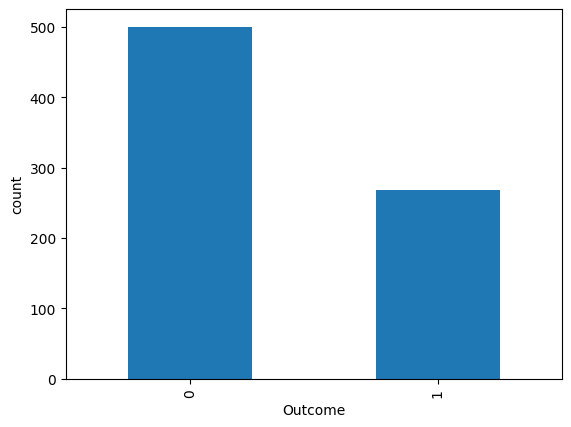

In [14]:
df['Outcome'].value_counts().plot(kind='bar')
plt.xlabel('Outcome')
plt.ylabel('count')
plt.show()

# **Check Corelation**

In [15]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

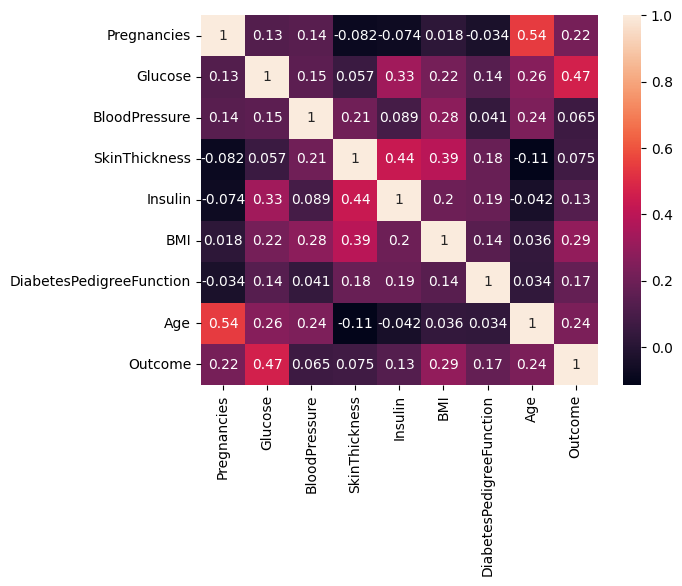

In [16]:
sns.heatmap(df.corr(),annot=True)

# **Split Data into train, test**

In [17]:
X=np.array(df[["Pregnancies",	"Glucose", 	"BloodPressure",	"SkinThickness", 	"Insulin" ,	"BMI",	"DiabetesPedigreeFunction",	"Age"]])

In [18]:
y=(df["Outcome"])

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# **Decision tree Classifier**

In [20]:
Model1=DecisionTreeClassifier()

In [21]:
Model1.fit(X_train,y_train)

DecisionTreeClassifier()

# **Model Score**

In [22]:
print(Model1.score(X_test,y_test))

0.7792207792207793


# **Prediction**

In [23]:
#features=["Pregnancies",	"Glucose", 	"BloodPressure",	"SkinThickness", 	"Insulin" ,	"BMI",	"DiabetesPedigreeFunction",	"Age"]

In [24]:
features1=np.array([[6	,148	,72	,35,	0	,33.6,	0.627	,50]])

In [25]:
print(Model1.predict(features1))

[1]


In [26]:
features2=np.array([[1,	85,	66	,29,	0	,26.6,	0.351,	31]])

In [27]:
print(Model1.predict(features2))

[0]


# **Logistic Regression**

In [28]:
Model2= LogisticRegression()

In [30]:
Model2.fit(X_train,y_train)

LogisticRegression()

In [31]:
y_pred=Model2.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [35]:
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.7467532467532467


In [36]:
print("Classification Report: \n",classification_report(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [37]:
print("Confusion Matrix : \n ",confusion_matrix(y_test,y_pred))

Confusion Matrix : 
  [[78 21]
 [18 37]]


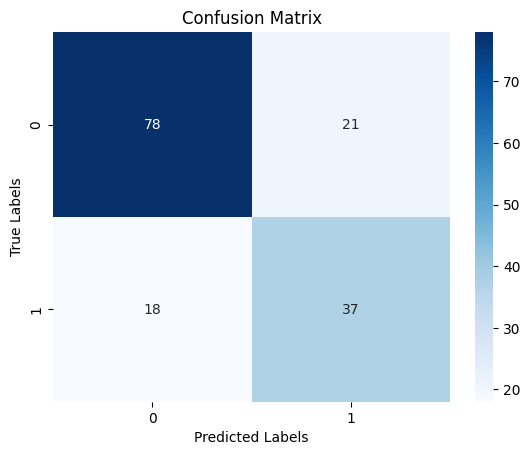

In [40]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# **Random Forest**

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
Model3= RandomForestClassifier(n_estimators=100,random_state=42)

In [44]:
Model3.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [45]:
y_pred=Model3.predict(X_test)

In [46]:
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.7207792207792207


In [47]:
print("Classification Report: \n",classification_report(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [48]:
print("Confusion Matrix : \n ",confusion_matrix(y_test,y_pred))

Confusion Matrix : 
  [[77 22]
 [21 34]]


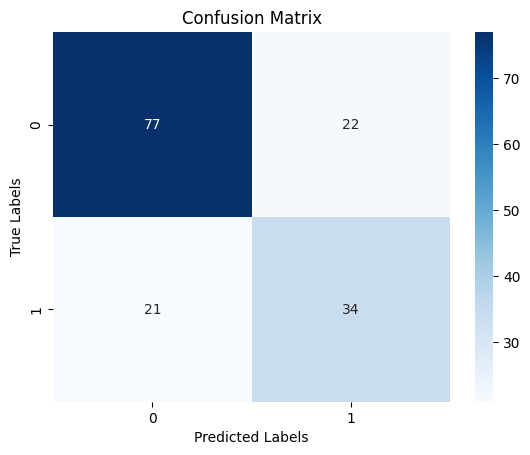

In [49]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# **SVM**

In [52]:
from sklearn.svm import SVC

In [53]:
Model4=SVC()

In [54]:
Model4.fit(X_train,y_train)

SVC()

In [55]:
y_pred=Model4.predict(X_test)

In [56]:
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.7662337662337663


In [57]:
print("Classification Report: \n",classification_report(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



In [58]:
print("Confusion Matrix : \n ",confusion_matrix(y_test,y_pred))

Confusion Matrix : 
  [[87 12]
 [24 31]]


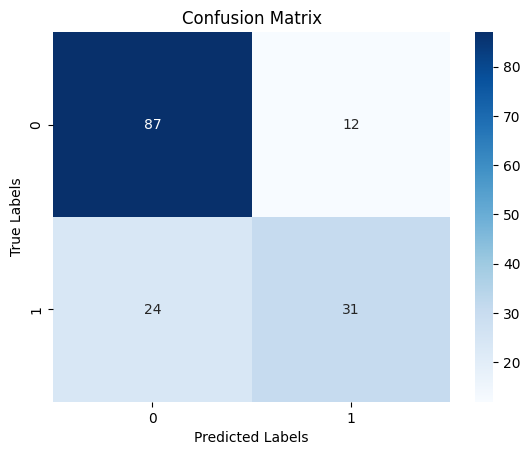

In [59]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()